In [1]:
import numpy as np
from TDD.TDD2 import Ini_TDD,Clear_TDD,set_index_order,get_tdd,to_cnf2,renorm
from TDD.TDD_Q2 import cir_2_tn,get_real_qubit_num,add_trace_line,add_inputs,add_outputs
from TDD.TDD_Q2 import reshape as reshape2
from TDD.TN2 import Index,Tensor,TensorNetwork
import time
import random
from qiskit import QuantumCircuit
from sympy import *
from sympy.parsing.sympy_parser import parse_expr

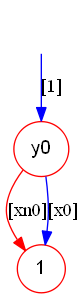

In [2]:
Ini_TDD(['x0','y0','x1','y1'])
A=['x0','y0','x1','y1','xn0']
[x0,y0,x1,y1,xn0]=symbols(A)
U=np.array([xn0,x0])
var=[Index('y0')]
ts1=Tensor(U,var)
ts1.tdd().show()
# ts2=Tensor(U,var)

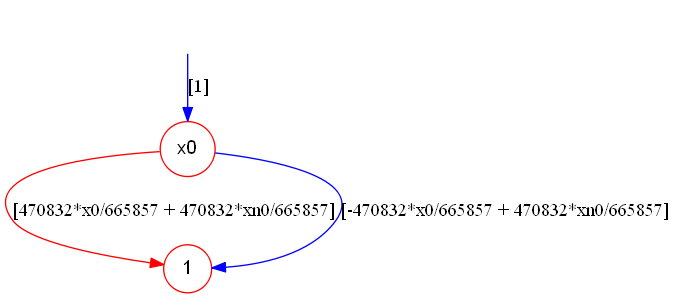

In [3]:
H=1/np.sqrt(2)*np.array([[1,1],[1,-1]])
var2=[Index('x0'),Index('y0')]
ts2=Tensor(H,var2)
# ts2.tdd().show()
tn=TensorNetwork([ts1,ts2])
tdd=tn.cont()
tdd.show()
# Clear_TDD()

w: [[470832*x2/665857 + 470832*xn2/665857], [-470832*x2/665857 + 470832*xn2/665857]]
wwwwwwwww
 -470832/665857
wwwwwwwww
 470832/665857
wwwwwwwww
 470832/665857
wwwwwwwww
 470832/665857
weigs2: [[1], [-x2 + xn2]]
w: [[470832*I*x2/665857 + 470832*xn2/665857], [-470832*I*x2/665857 + 470832*xn2/665857]]
wwwwwwwww
 -470832*I/665857
wwwwwwwww
 470832/665857
wwwwwwwww
 470832*I/665857
wwwwwwwww
 470832/665857
weigs2: [[1], [-x2 + xn2]]
w: [[470832*x2/665857 + 470832*xn2/665857, 470832*x1/665857 + 470832*xn1/665857], [470832*I*x2/665857 + 470832*xn2/665857, -470832*x1/665857 + 470832*xn1/665857]]
wwwwwwwww
 470832*I/665857
wwwwwwwww
 470832/665857
wwwwwwwww
 470832/665857
wwwwwwwww
 470832/665857
wwwwwwwww
 -470832/665857
wwwwwwwww
 470832/665857
wwwwwwwww
 470832/665857
wwwwwwwww
 470832/665857
weigs2: [[1], [I*x2 + xn2, -x1 + xn1]]
w: [[x2/2 + I*x2/2 + 470832*xn2/665857], [-x2/2 - I*x2/2 + 470832*xn2/665857]]
wwwwwwwww
 -1/2 - I/2
wwwwwwwww
 470832/665857
wwwwwwwww
 1/2 + I/2
wwwwwwwww
 470

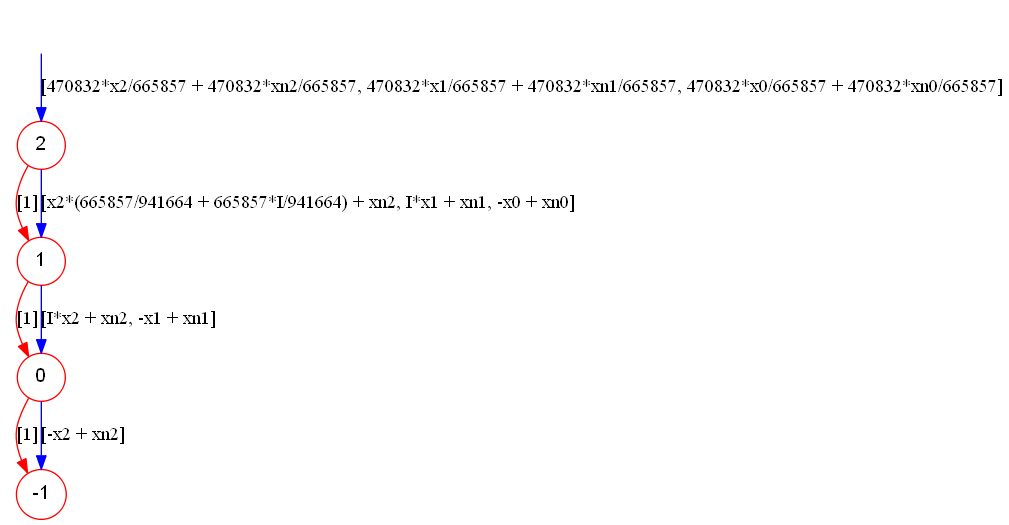

In [4]:
path='Benchmarks/'
file_name='qft_3.qasm'
cir=QuantumCircuit.from_qasm_file(path+file_name)
tn,indices=cir_2_tn(cir)
for k in range(3):
    x_k='x'+str(k)
    xn_k='xn'+str(k)
    s=Symbol(x_k)
    ns=Symbol(xn_k)
    U=np.array([ns,s])
#     U=np.array([1,0])
    temp_ts=Tensor(U,[Index(x_k)])
    tn.tensors.insert(0,temp_ts)
Ini_TDD(indices)
tdd=tn.cont()
tdd=renorm(tdd)
tdd.show()

In [5]:
print(470832/665857)
print(665857/941664)

0.7071067811857501
0.7071067811873449


In [6]:
x=symbols('x1')
nx=symbols('xn1')
y=symbols('x2')
ny=symbols('xn2')
s=2*x+3*nx+2*x*y+3*nx*y+2*x*ny+3*nx*ny+(0.0000001+0.0000001*I)*nx
print(s)
t=to_cnf2(s,n=2)
print(t)
print(t[0]*t[1])

2*x1*x2 + 2*x1*xn2 + 2*x1 + 3*x2*xn1 + 3*xn1*xn2 + 3*xn1 + xn1*(1.0e-7 + 1.0e-7*I)
[x2 + xn2 + 1, 2*x1 + 3*xn1]
(2*x1 + 3*xn1)*(x2 + xn2 + 1)


In [7]:
s=x*2+x*y
print(s)
print(to_cnf2(s))

x1*x2 + 2*x1
[x1, x2 + 2]


In [8]:
s=2*x+3*nx+2*x*y+3*nx*y+2*x*ny+3*nx*ny+I*x*(y+ny+1)
s=nsimplify(s,tolerance=1e-4,rational=False)
factor(s)
sm=[str(item) for item in s.free_symbols]
ss=2*symbols(sm[0])
ss

2*x2

In [9]:
type(x+nx)

sympy.core.add.Add